C:\Users\Smile\AppData\Local\Temp\ipykernel_7772\174023379.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df14.dropna(inplace=True)


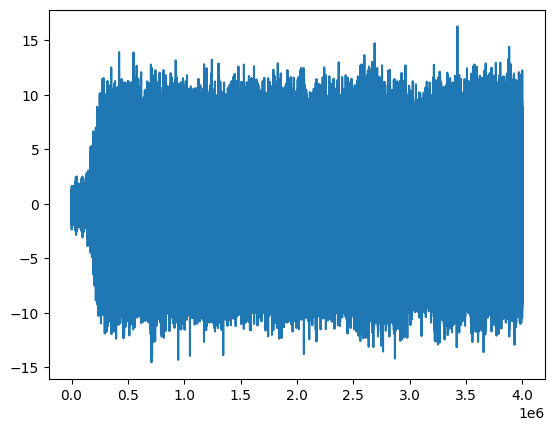

In [1]:
from nptdms import TdmsFile
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft,rfft,ifft
from scipy.fft import fftfreq,rfftfreq
from scipy.signal import find_peaks as fp
from sympy import ifft
import seaborn as sns
from sklearn import linear_model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy import stats

file_path = r"C:\New Volume for me\VSCode\ML\Dinesh\14\14_0001.tdms"
with TdmsFile.read(file_path) as tdms_file:
    df14=tdms_file.as_dataframe()
new_name={"/'Group Name'/'Sound Pressure'":"SoundPressure","/'Group Name'/'Velocity'":"Velocity"}
df14=df14.rename(columns=new_name)
df14['target']='New'
#plt.plot(df15['SoundPressure'])
df14_raw=df14
df14 = df14[df14.index<=4e+6]
df14.dropna(inplace=True)

plt.plot(df14['SoundPressure'])
plt.show()

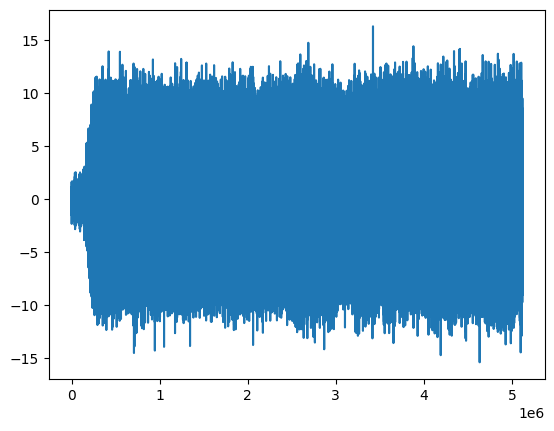

In [2]:
plt.plot(df14_raw['SoundPressure'])
         

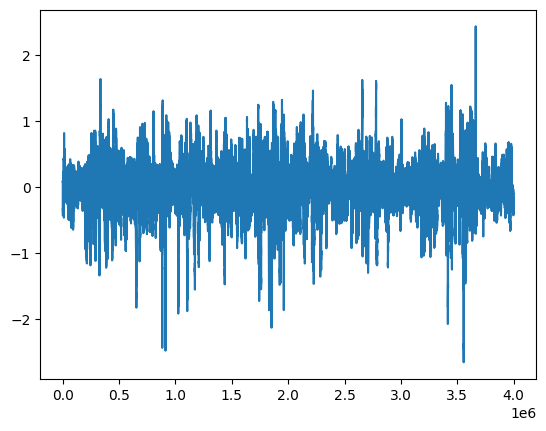

In [3]:
plt.plot(df14['Velocity'])
plt.show()

In [4]:

df14 = df14[ abs((df14['SoundPressure']) <15) & (df14['SoundPressure'] >10)]
print(df14.info())
print(df14.describe())



<class 'pandas.core.frame.DataFrame'>
Index: 984 entries, 250145 to 3998161
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SoundPressure  984 non-null    float64
 1   Velocity       984 non-null    float64
 2   target         984 non-null    object 
dtypes: float64(2), object(1)
memory usage: 30.8+ KB
None
       SoundPressure    Velocity
count     984.000000  984.000000
mean       10.820105   -0.000462
std         0.728949    0.378780
min        10.000875   -1.731248
25%        10.246434   -0.207251
50%        10.613370    0.007528
75%        11.167139    0.248923
max        14.720169    1.331511


plt.plot(df14['SoundPressure'])

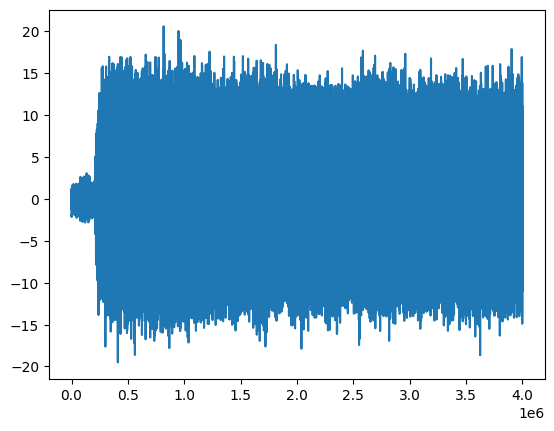

In [5]:
file_path = r"C:\New Volume for me\VSCode\ML\Dinesh\20\20_0001.tdms"
with TdmsFile.read(file_path) as tdms_file:
    df20=tdms_file.as_dataframe()
new_name={"/'Group Name'/'Sound Pressure'":"SoundPressure","/'Group Name'/'Velocity'":"Velocity"}
df20=df20.rename(columns=new_name)
df20['target']='Slightly'
#plt.plot(df15['SoundPressure'])
df20_raw=df20
df20 = df20.drop(df20[(df20['SoundPressure'] >4e+06)].index)
df20.dropna(inplace=True)
df20=df20[df20.index<=4e+06]
plt.plot(df20['SoundPressure'])
plt.show()

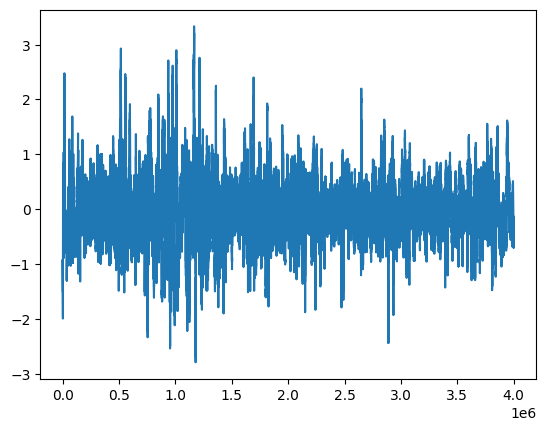

In [6]:
plt.plot(df20['Velocity'])
plt.show()

In [7]:
df20 = df20[(df20['SoundPressure'] <20) & (df20['SoundPressure'] > 15)]
print(df20.describe())
print(df20.info())

       SoundPressure    Velocity
count     165.000000  165.000000
mean       15.907958    0.004324
std         0.810868    0.651551
min        15.001449   -1.337464
25%        15.304424   -0.351061
50%        15.679962   -0.070096
75%        16.249629    0.217971
max        19.962375    2.757305
<class 'pandas.core.frame.DataFrame'>
Index: 165 entries, 268482 to 3994155
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SoundPressure  165 non-null    float64
 1   Velocity       165 non-null    float64
 2   target         165 non-null    object 
dtypes: float64(2), object(1)
memory usage: 5.2+ KB
None


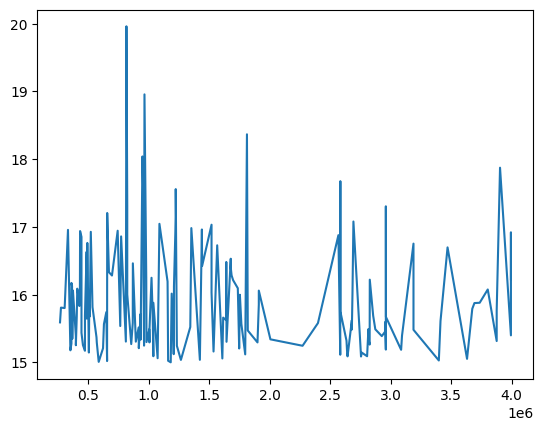

In [8]:
plt.plot(df20['SoundPressure'])

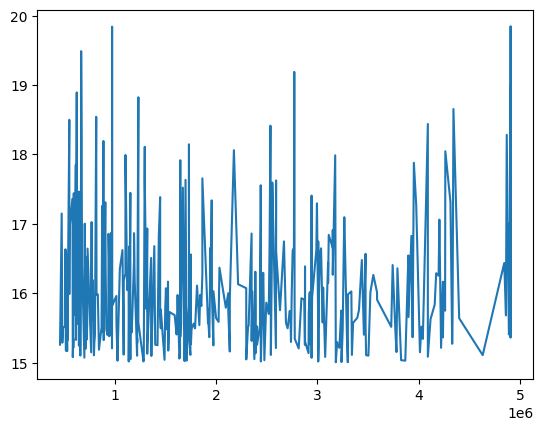

In [9]:
#extra datapoints for better confusion matrix
file_path = r"C:\New Volume for me\VSCode\ML\Dinesh\20\20_0002.tdms"
with TdmsFile.read(file_path) as tdms_file:
    df20_1=tdms_file.as_dataframe()
new_name={"/'Group Name'/'Sound Pressure'":"SoundPressure","/'Group Name'/'Velocity'":"Velocity"}
df20_1=df20_1.rename(columns=new_name)
df20_1['target']='Slightly'
#plt.plot(df15['SoundPressure'])
df20_raw_1=df20_1
df20_1 = df20_1.drop(df20_1[(df20_1['SoundPressure'] >4e+06)].index)
df20_1.dropna(inplace=True)
df20_1=df20_1[(df20_1['SoundPressure']>15) & (df20_1['SoundPressure']<20) ]
plt.plot(df20_1['SoundPressure'])
plt.show()

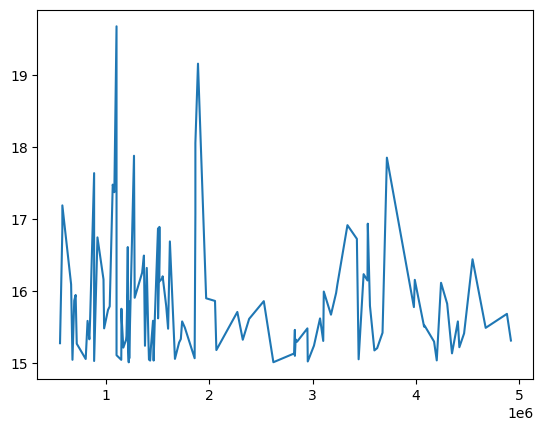

In [10]:
#new datapoints for better classifications
#extra datapoints for better confusion matrix
file_path = r"C:\New Volume for me\VSCode\ML\Dinesh\20\20_0003.tdms"
with TdmsFile.read(file_path) as tdms_file:
    df20_2=tdms_file.as_dataframe()
new_name={"/'Group Name'/'Sound Pressure'":"SoundPressure","/'Group Name'/'Velocity'":"Velocity"}
df20_2=df20_2.rename(columns=new_name)
df20_2['target']='Slightly'
#plt.plot(df15['SoundPressure'])
df20_raw_2=df20_2

#df20_2 = df20_2.drop(df20_2[(df20_2['SoundPressure'] >4e+06)].index)
#df20_1.dropna(inplace=True)
df20_2=df20_2[(df20_2['SoundPressure']>15) & (df20_2['SoundPressure']<20)]
plt.plot(df20_2['SoundPressure'])
plt.show()

In [11]:
df20=pd.concat([df20,df20_1,df20_2])
print(len(df20))

656


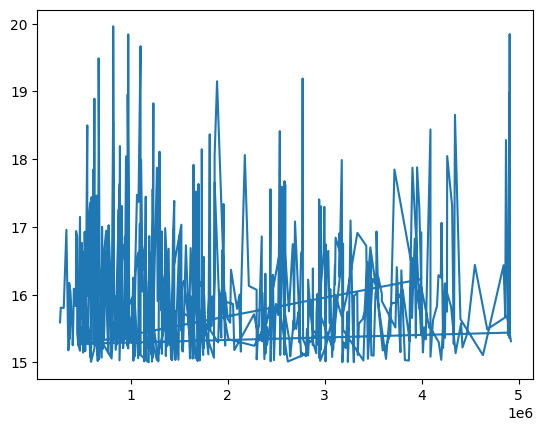

In [12]:
plt.plot(df20['SoundPressure'])

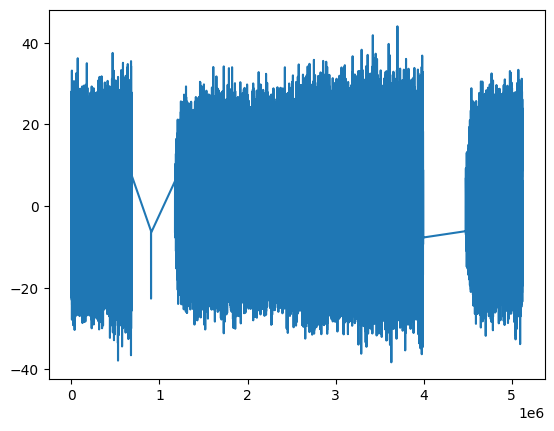

In [13]:
file_path = r"C:\New Volume for me\VSCode\ML\Dinesh\9\9_0001.tdms"
with TdmsFile.read(file_path) as tdms_file:
    df9=tdms_file.as_dataframe()
new_name={"/'Group Name'/'Sound Pressure'":"SoundPressure","/'Group Name'/'Velocity'":"Velocity"}
df9=df9.rename(columns=new_name)
df9['target']='Working'
#plt.plot(df15['SoundPressure'])
df9_raw=df9
df9 = df9.drop(df9[((df9['SoundPressure'] < 6) & (df9['SoundPressure'] > -6))].index)
df9.dropna(inplace=True)
plt.plot(df9['SoundPressure'])
plt.show()

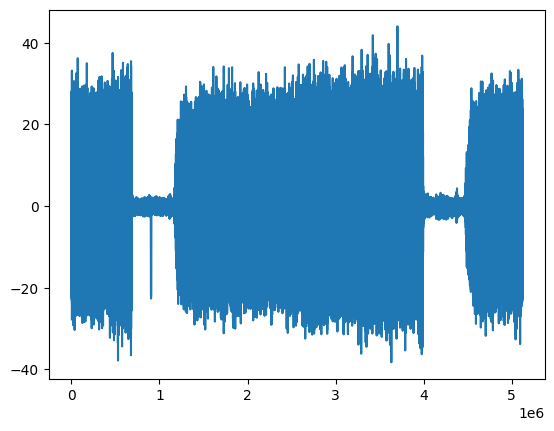

In [14]:
plt.plot(df9_raw['SoundPressure'])

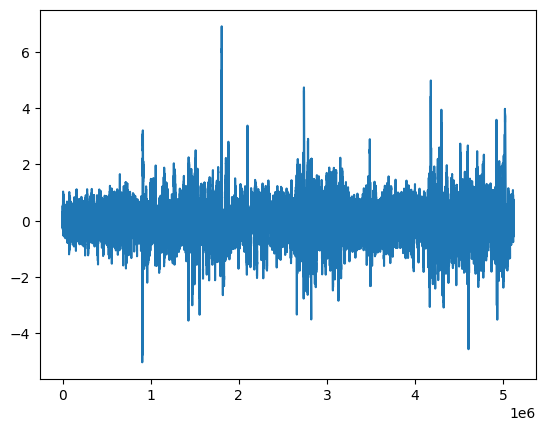

In [15]:
plt.plot(df9_raw['Velocity'])
plt.show()

In [16]:
df9=df9[(df9['SoundPressure'] >30)]
print(df9.describe())
print(df9.info())

       SoundPressure    Velocity
count     238.000000  238.000000
mean       32.170155   -0.023871
std         2.084106    0.603120
min        30.026736   -1.571290
25%        30.655502   -0.413601
50%        31.693657   -0.012322
75%        33.089677    0.331145
max        44.057445    2.049660
<class 'pandas.core.frame.DataFrame'>
Index: 238 entries, 5733 to 5113907
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SoundPressure  238 non-null    float64
 1   Velocity       238 non-null    float64
 2   target         238 non-null    object 
dtypes: float64(2), object(1)
memory usage: 7.4+ KB
None


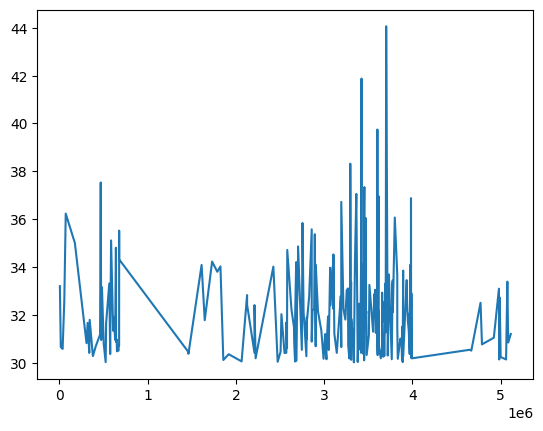

In [17]:
plt.plot(df9['SoundPressure'])
plt.show()

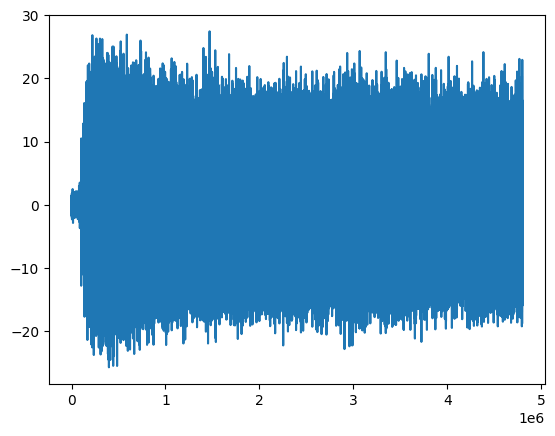

In [18]:
file_path = r"C:\New Volume for me\VSCode\ML\Dinesh\11\11_0001.tdms"
with TdmsFile.read(file_path) as tdms_file:
    df11=tdms_file.as_dataframe()
new_name={"/'Group Name'/'Sound Pressure'":"SoundPressure","/'Group Name'/'Velocity'":"Velocity"}
df11=df11.rename(columns=new_name)
df11['target']='Working'
#plt.plot(df15['SoundPressure'])
df11_raw=df11
df11 = df11.drop(df11[(df11['SoundPressure'] > 4.813e+06)].index)
df11.dropna(inplace=True)
df11=df11[df11.index<=4.8e+6]
plt.plot(df11['SoundPressure'])
plt.show()

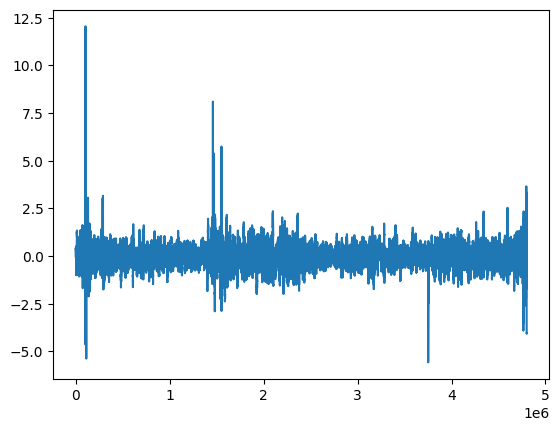

In [19]:
plt.plot(df11['Velocity'])
plt.show()

In [20]:
df11=df11[(df11['SoundPressure']>20)&(df11['SoundPressure']<30)]
print(df11.info())
print(df11.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 347 entries, 174236 to 4798417
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SoundPressure  347 non-null    float64
 1   Velocity       347 non-null    float64
 2   target         347 non-null    object 
dtypes: float64(2), object(1)
memory usage: 10.8+ KB
None
       SoundPressure    Velocity
count     347.000000  347.000000
mean       21.519187    0.046627
std         1.423034    0.563990
min        20.003519   -1.571738
25%        20.471821   -0.283810
50%        21.151082    0.042237
75%        22.190546    0.307408
max        27.444721    5.044160


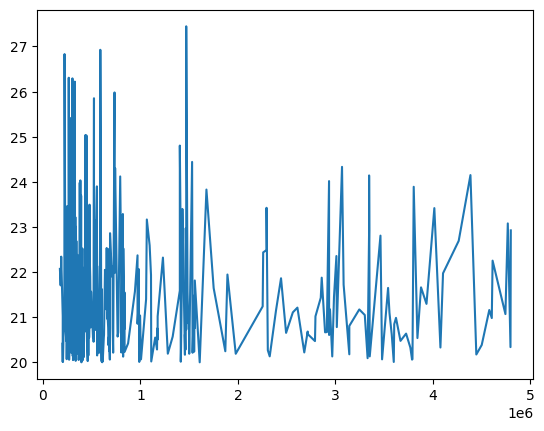

In [21]:
plt.plot(df11['SoundPressure'])
plt.show()

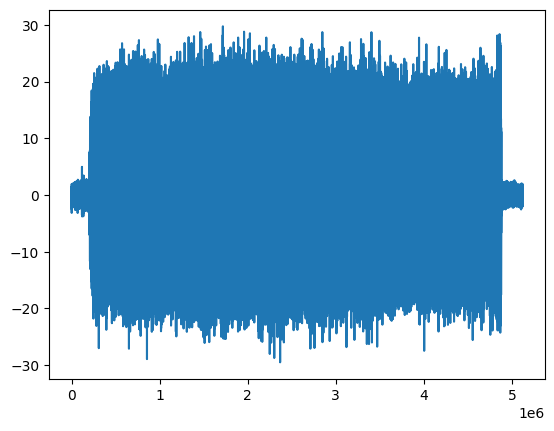

In [22]:
#extra datapoints for better confusion matrix
file_path = r"C:\New Volume for me\VSCode\ML\Dinesh\11\11_0002.tdms"
with TdmsFile.read(file_path) as tdms_file:
    df11_1=tdms_file.as_dataframe()
new_name={"/'Group Name'/'Sound Pressure'":"SoundPressure","/'Group Name'/'Velocity'":"Velocity"}
df11_1=df11_1.rename(columns=new_name)
df11_1['target']='Working'
#plt.plot(df15['SoundPressure'])
df11_1_raw=df11_1
df11_1=df11_1[(df11_1['SoundPressure']>20)&(df11_1['SoundPressure']<30)]
plt.plot(df11_1_raw['SoundPressure'])


2017


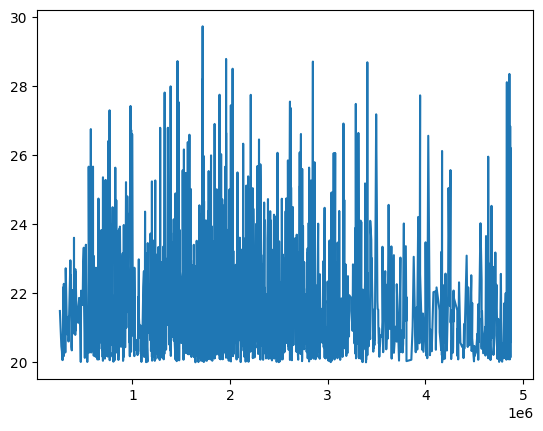

In [23]:
plt.plot(df11_1['SoundPressure'])
print(len(df11_1))

In [24]:
print(df11_1.shape)
print(df11.shape)
df11=pd.concat([df11,df11_1])

(2017, 3)
(347, 3)


In [25]:
print(df11.shape)

(2364, 3)


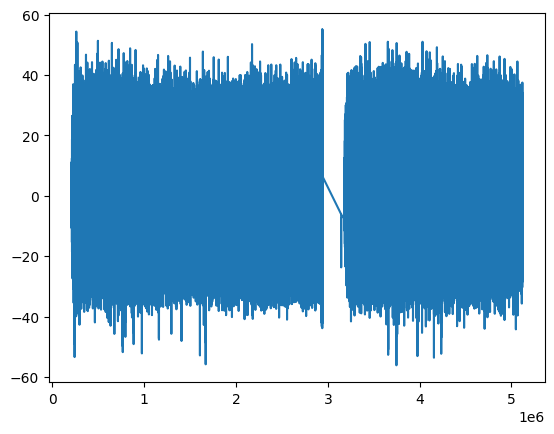

In [26]:
file_path = r"C:\New Volume for me\VSCode\ML\Dinesh\6\6_0001.tdms"
with TdmsFile.read(file_path) as tdms_file:
    df6=tdms_file.as_dataframe()
new_name={"/'Group Name'/'Sound Pressure'":"SoundPressure","/'Group Name'/'Velocity'":"Velocity"}
df6=df6.rename(columns=new_name)
df6['target']='Severe'
#plt.plot(df15['SoundPressure'])
df6_raw=df6
df6 = df6.drop(df6[((df6['SoundPressure'] < 6) & (df6['SoundPressure'] > -6))].index)
df6.dropna(inplace=True)
plt.plot(df6['SoundPressure'])
plt.show()

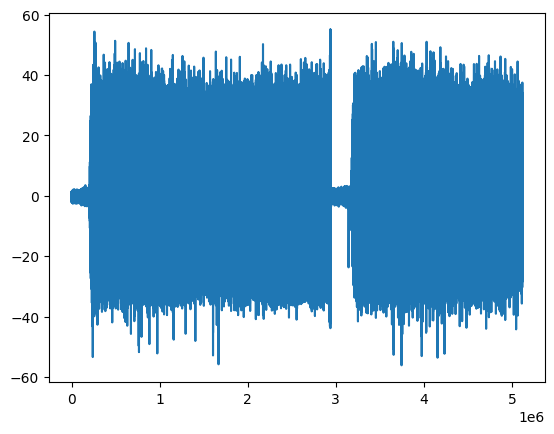

In [27]:
plt.plot(df6_raw['SoundPressure'])

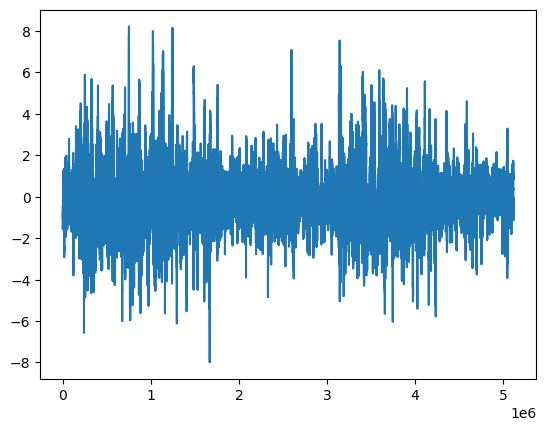

In [28]:
plt.plot(df6_raw['Velocity'])
plt.show()

In [29]:
df6=df6[(df6['SoundPressure']<60) & (df6['SoundPressure']>40)]
print(df6.info())
print(df6.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 341 entries, 245444 to 5065154
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SoundPressure  341 non-null    float64
 1   Velocity       341 non-null    float64
 2   target         341 non-null    object 
dtypes: float64(2), object(1)
memory usage: 10.7+ KB
None
       SoundPressure    Velocity
count     341.000000  341.000000
mean       42.790692    0.165099
std         2.675639    1.542158
min        40.007312   -3.474379
25%        40.852648   -0.801030
50%        42.023775    0.017715
75%        43.846111    0.906289
max        55.159026    7.147543


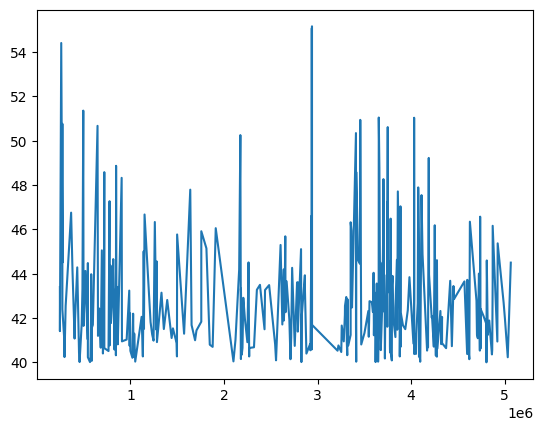

In [30]:
plt.plot(df6['SoundPressure'])

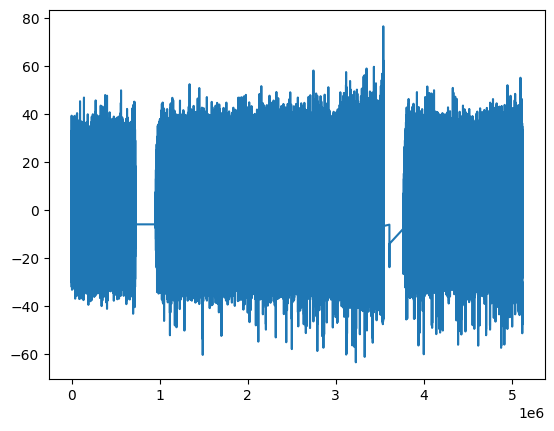

In [31]:
#extra datapoints for better dataset
file_path = r"C:\New Volume for me\VSCode\ML\Dinesh\6\6_0002.tdms"
with TdmsFile.read(file_path) as tdms_file:
    df6_1=tdms_file.as_dataframe()
new_name={"/'Group Name'/'Sound Pressure'":"SoundPressure","/'Group Name'/'Velocity'":"Velocity"}
df6_1=df6_1.rename(columns=new_name)
df6_1['target']='Severe'
#plt.plot(df15['SoundPressure'])
df6_raw_1=df6_1
df6_1 = df6_1.drop(df6_1[((df6_1['SoundPressure'] < 6) & (df6_1['SoundPressure'] > -6))].index)
df6.dropna(inplace=True)
plt.plot(df6_1['SoundPressure'])
plt.show()

In [32]:
df6_1=df6_1[(df6_1['SoundPressure']<60) & (df6_1['SoundPressure']>40)]
print(df6_1.info())
print(df6_1.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 695 entries, 63034 to 5114608
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SoundPressure  695 non-null    float64
 1   Velocity       695 non-null    float64
 2   target         695 non-null    object 
dtypes: float64(2), object(1)
memory usage: 21.7+ KB
None
       SoundPressure    Velocity
count     695.000000  695.000000
mean       43.388024    0.170204
std         3.443881    1.721983
min        40.008434   -4.356038
25%        40.892671   -0.914896
50%        42.302437    0.264474
75%        44.687893    1.142563
max        59.530835    6.007723


In [33]:
df6=pd.concat([df6,df6_1])
df6.shape

(1036, 3)

In [34]:
df6['target'].unique()

array(['Severe'], dtype=object)

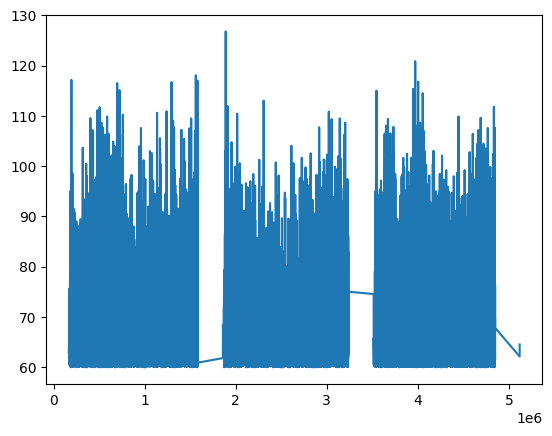

In [35]:
file_path = r"C:\New Volume for me\VSCode\ML\Dinesh\18\18_0001.tdms"
with TdmsFile.read(file_path) as tdms_file:
    df18=tdms_file.as_dataframe()
new_name={"/'Group Name'/'Sound Pressure'":"SoundPressure","/'Group Name'/'Velocity'":"Velocity"}
df18=df18.rename(columns=new_name)
df18['target']='Wornout'
#plt.plot(df15['SoundPressure'])
df18_raw=df18
df18 = df18.drop(df18[((df18['SoundPressure'] < 6) & (df18['SoundPressure'] > -6))].index)
df18.dropna(inplace=True)

df18=df18[(df18['SoundPressure']>60)]
df18=df18.dropna()
plt.plot(df18['SoundPressure'])
plt.show()

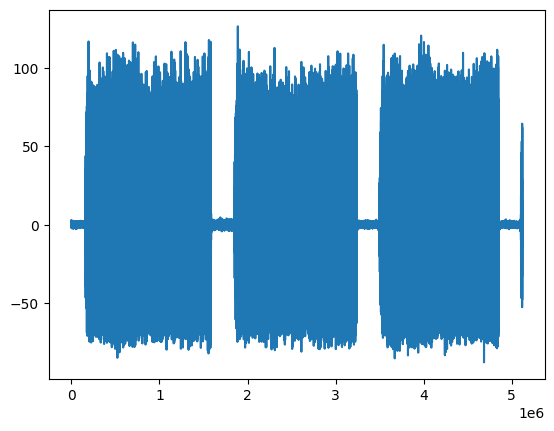

In [36]:
plt.plot(df18_raw['SoundPressure'])
plt.show()

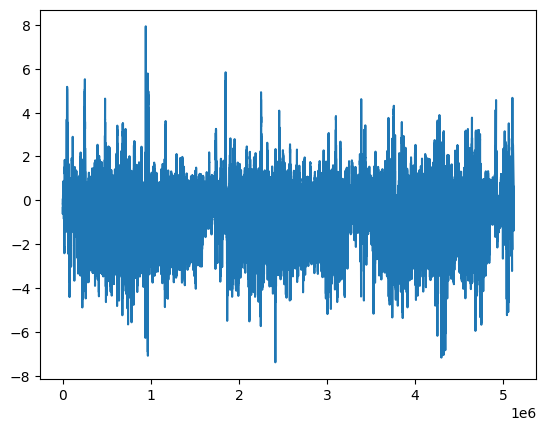

In [37]:
plt.plot(df18_raw['Velocity'])
plt.show()

In [38]:
print(df18.info())
print(df18.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 28977 entries, 166179 to 5118556
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SoundPressure  28977 non-null  float64
 1   Velocity       28977 non-null  float64
 2   target         28977 non-null  object 
dtypes: float64(2), object(1)
memory usage: 905.5+ KB
None
       SoundPressure      Velocity
count   28977.000000  28977.000000
mean       68.685157     -0.122437
std         8.060336      0.994203
min        60.000258     -6.553250
25%        62.691868     -0.663912
50%        66.332424     -0.098544
75%        72.324958      0.423162
max       126.828187      5.981481


In [39]:
print("New",df14.shape)
print("Slightly",df20.shape)
print("Working",df11.shape)
print("Working",df9.shape)
print("Severe",df6.shape)

New (984, 3)
Slightly (656, 3)
Working (2364, 3)
Working (238, 3)
Severe (1036, 3)


In [40]:
df6.iloc[:500].shape

(500, 3)

In [41]:
df6.columns
df6.target

245444     Severe
245749     Severe
259813     Severe
271894     Severe
271922     Severe
            ...  
5099810    Severe
5099892    Severe
5104714    Severe
5107567    Severe
5114608    Severe
Name: target, Length: 1036, dtype: object

In [42]:
df=pd.concat([df14.iloc[:500],df20.iloc[:500],df11.iloc[:500],df6.iloc[:500],df18.iloc[:500]])
df.shape

(2500, 3)

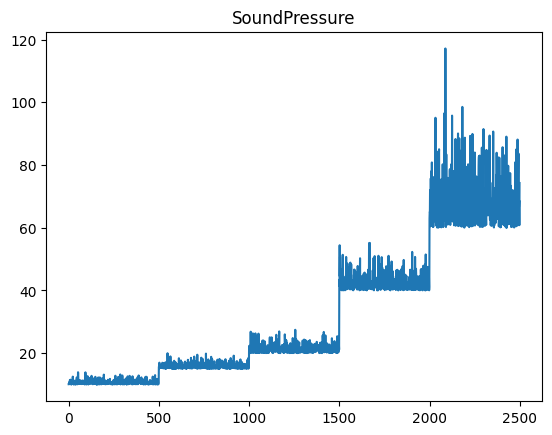

       SoundPressure     Velocity
count    2500.000000  2500.000000
mean       31.872341     0.035053
std        21.574024     1.053829
min        10.000875    -3.882144
25%        15.322845    -0.462544
50%        21.176330    -0.011967
75%        43.861353     0.437965
max       117.162181     7.147543


<class 'pandas.core.frame.DataFrame'>
Index: 2500 entries, 250145 to 268535
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SoundPressure  2500 non-null   float64
 1   Velocity       2500 non-null   float64
 2   target         2500 non-null   object 
dtypes: float64(2), object(1)
memory usage: 78.1+ KB
None


In [43]:
x_axis=np.arange(0,len(df))
plt.plot(x_axis,df['SoundPressure'])
plt.title("SoundPressure")
plt.show()
print(df.describe())
print("\n")
print(df.info())

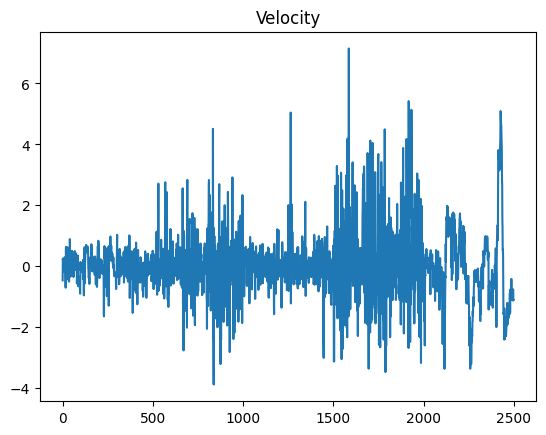

In [44]:
x_axis=np.arange(0,len(df))
plt.plot(x_axis,df['Velocity'])
plt.title("Velocity")
plt.show()

In [45]:
df['target'].unique()

array(['New', 'Slightly', 'Working', 'Severe', 'Wornout'], dtype=object)

In [46]:
len(df)

2500

In [47]:
from sklearn.decomposition import PCA
X=df.drop(columns=['target'])
X1=X
X=np.abs(X)
y=df['target']
y1=y
y.unique()

array(['New', 'Slightly', 'Working', 'Severe', 'Wornout'], dtype=object)

<Axes: >

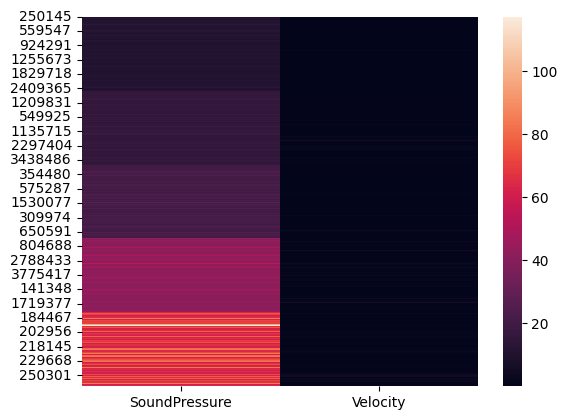

In [48]:
sns.heatmap(X)

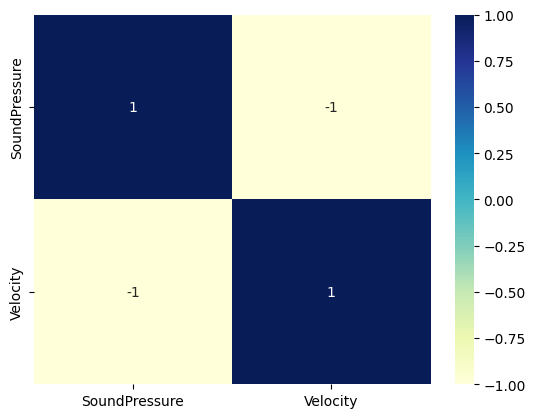

In [49]:
import seaborn as sb
data=X.corr()
dataplot = sb.heatmap(data.corr(), cmap="YlGnBu", annot=True) 

In [50]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
np.unique(y)

array([0, 1, 2, 3, 4])

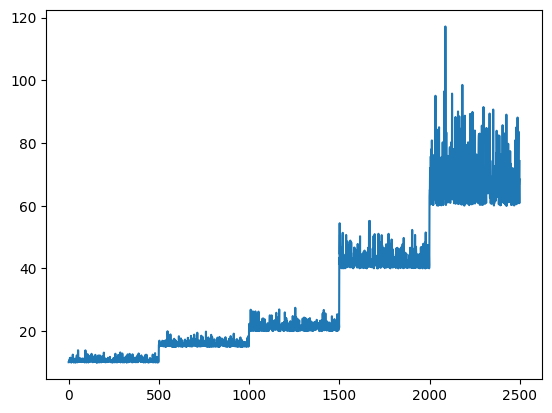

In [51]:
x_axis=np.arange(0,len(X))
plt.plot(x_axis,X['SoundPressure'])


In [52]:
# import h5py

# # Define the output file path
# output_file = "Accepted_dataset.h5"

# # Create or open an HDF5 file in write mode
# with h5py.File(output_file, "w") as hdf_file:
#     # Create a group for input features
#     input_group = hdf_file.create_group("InputFeatures")
    
#     # Convert input features DataFrame to numpy array and write it to the HDF5 file
#     for col in X.columns:
#         input_group.create_dataset(col, data=X[col].values)
    
#     # Create a group for target labels
#     target_group = hdf_file.create_group("TargetLabels")
    
#     # Convert target labels Series to numpy array and write it to the HDF5 file
#     target_group.create_dataset("target", data=df['target'].values)

# print("Merged datasets have been written to", output_file)

In [53]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
#y=y/4

In [54]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.50,random_state=104)
print(len(X_train),len(y_train))

1250 1250


In [55]:
# import tensorflow as tf
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
# from tensorflow.keras.regularizers import l2,l1
# model=Sequential()
# model.add(SimpleRNN(units=8,activation='relu',input_shape=(2,1)))
# model.add(Dense(units=16, activation='relu',kernel_initializer='he_uniform', kernel_regularizer=l2(0.01)))
# model.add(Dense(units=10,activation='relu',kernel_initializer='he_uniform', kernel_regularizer=l2(0.01 )))
# model.add(Dense(units=5,activation='relu',kernel_initializer='he_uniform', kernel_regularizer=l2(0.01 ) ))


# model.compile(optimizer='adam', loss='mse',metrics='accuracy')

In [56]:
# model.fit(X_scaled,y,epochs=100,batch_size=100)

In [57]:
# y_pred=model.predict(X_test)
# y_pred.shape

In [58]:
# y_pred[:20]

In [59]:
# y_test[:20]

In [60]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

gini=DecisionTreeClassifier(criterion="gini",random_state=100,max_depth=10, min_samples_leaf=2)
gini.fit(X_test,y_test)
y_predict_gini=gini.predict(X_train)
print("accuracy: ",accuracy_score(y_predict_gini,y_train))                
print("precision: ",precision_score(y_predict_gini,y_train,average='weighted'))
print("recall score: ",recall_score(y_predict_gini,y_train,average='weighted'))
print("f1 score: ",f1_score(y_predict_gini,y_train,average='weighted'))

accuracy:  0.9984
precision:  0.9984135021097047
recall score:  0.9984
f1 score:  0.9984002025795123


In [61]:
from sklearn.preprocessing import label_binarize
pred_bin=label_binarize(y_predict_gini,classes=[0,1,2,3,4])
train_bin=label_binarize(y_predict_gini,classes=[0,1,2,3,4])

In [62]:
%matplotlib qt
from sklearn.metrics import roc_curve, roc_auc_score
fpr=dict()
tpr=dict()
roc_auc=dict()
for i in range(5):
    fpr[i],tpr[i],thresholds = roc_curve(train_bin[:,i],pred_bin[:,i])
    roc_auc[i] = roc_auc_score(train_bin[:,i],pred_bin[:,i])
plt.figure()
for i in range(5):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for raw data')
plt.legend(loc="lower right")
plt.show()

In [63]:
print(X_train.shape)

(1250, 2)


In [95]:
entropy=DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=10, min_samples_leaf=2)
entropy.fit(X_test,y_test)
y_predict_entropy=entropy.predict(X_train)
print(accuracy_score(y_predict_entropy,y_train))                

0.9984


In [97]:
# Statistical test
contingency = pd.crosstab(y_test, y_predict_entropy)
chi2, p_value = stats.chi2_contingency(contingency)[:2]
print(f"P-value: {p_value:.4f}")
print(f"Chi-square statistic: {chi2:.4f}")

P-value: 0.1184
Chi-square statistic: 22.8267


Text(0.5, 1.0, 'Decision Tree with filtered data')

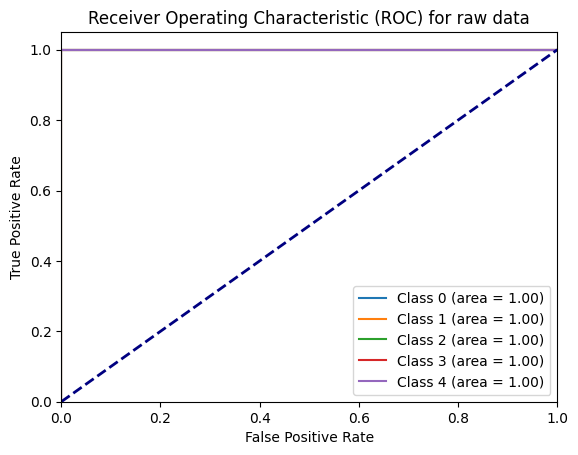

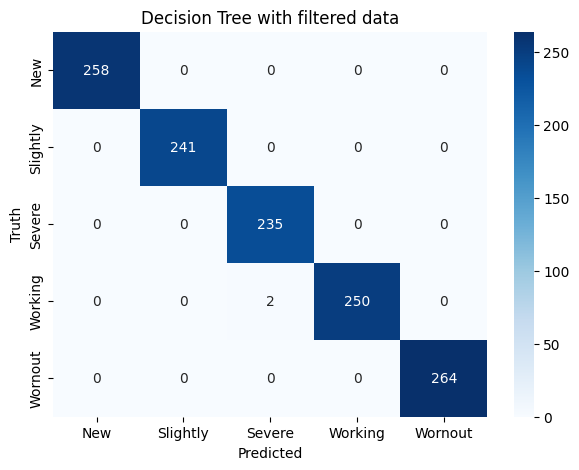

In [65]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_predict_entropy,y_train)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm,fmt='g', annot=True,xticklabels=['New','Slightly','Severe','Working','Wornout'],yticklabels=['New','Slightly','Severe','Working','Wornout'],cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Decision Tree with filtered data')

In [69]:
# Statistical test
contingency = pd.crosstab(y_test, y_predict_entropy)
chi2, p_value = stats.chi2_contingency(contingency)
print(f"P-value: {p_value:.4f}")
print(f"Chi-square statistic: {chi2:.4f}")

P-value: 0.1184
Chi-square statistic: 22.8267


In [82]:
df18short={'mean sp':list(),'median sp':list(),'variance sp':list(),'std sp':list(),'1st quartile sp':list(),'3rd quartile sp':list(),'iqr sp':list(),'skew sp':list(),'kurt sp':list(),'max sp':list(),'min sp':list(),'range sp':list(),'target sp':list()}
pd.options.mode.copy_on_write = True 
X_here=X.drop(columns=['Velocity'])
for i in range(0,len(df),10):
    df18short['mean sp'].append(X_here.iloc[i:i+10].mean())
    df18short['median sp'].append(X_here.iloc[i:i+10].median())
    #df18short['mode'].append(X_here.iloc[i:i+10].mode())
    df18short['variance sp'].append(X_here.iloc[i:i+10].var())
    df18short['std sp'].append(X_here.iloc[i:i+10].std())
    df18short['1st quartile sp'].append(X_here.iloc[i:i+10].quantile(0.25))
    df18short['3rd quartile sp'].append(X_here.iloc[i:i+10].quantile(0.75))
    df18short['iqr sp'].append(X_here.iloc[i:i+10].quantile(0.75)-X_here.iloc[i:i+10].quantile(0.25))
    df18short['skew sp'].append(X_here.iloc[i:i+10].skew())
    df18short['kurt sp'].append(X_here.iloc[i:i+10].kurt())
    df18short['max sp'].append(X_here.iloc[i:i+10].max())
    df18short['min sp'].append(X_here.iloc[i:i+10].min())
    df18short['range sp'].append(X_here.iloc[i:i+10].max()-X_here.iloc[i:i+10].min())    

In [83]:
for i in range(0,len(df),10):
    df18short['target sp'].append(y[i])


In [84]:
feat=pd.DataFrame(df18short)
feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   mean sp          250 non-null    object
 1   median sp        250 non-null    object
 2   variance sp      250 non-null    object
 3   std sp           250 non-null    object
 4   1st quartile sp  250 non-null    object
 5   3rd quartile sp  250 non-null    object
 6   iqr sp           250 non-null    object
 7   skew sp          250 non-null    object
 8   kurt sp          250 non-null    object
 9   max sp           250 non-null    object
 10  min sp           250 non-null    object
 11  range sp         250 non-null    object
 12  target sp        250 non-null    int32 
dtypes: int32(1), object(12)
memory usage: 24.5+ KB


In [85]:
input=feat.drop(columns=['target sp'])
output=feat['target sp']
print(input.shape,output.shape)


(250, 12) (250,)


In [86]:
input_train,input_test,output_train,output_test=train_test_split(input,output,test_size=0.5,random_state=104,stratify=output)
print(len(input_train),len(output_train))

125 125


In [87]:
entropy=DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=50, min_samples_leaf=3)
entropy.fit(input_test,output_test)
y_predict_entropy_f=entropy.predict(input_train)
print("accuracy: ",accuracy_score(y_predict_entropy_f,output_train)) 
print("precision: ",precision_score(y_predict_entropy_f,output_train,average='weighted'))
print("recall: ",recall_score(y_predict_entropy_f,output_train,average='weighted'))
print("f1 score: ",f1_score(y_predict_entropy_f,output_train,average='weighted'))
print(y_predict_entropy_f[:10])

accuracy:  1.0
precision:  1.0
recall:  1.0
f1 score:  1.0
[0 0 0 4 3 4 0 2 4 1]


C:\Users\Smile\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_array_api.py:380: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)
C:\Users\Smile\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_array_api.py:380: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)


In [94]:
# Statistical test
contingency = pd.crosstab(output_train, y_predict_entropy_f)
chi2, p_value = stats.chi2_contingency(contingency)[:2]
print(f"P-value: {p_value:.4f}")
print(f"Chi-square statistic: {chi2:.4f}")

P-value: 0.0000
Chi-square statistic: 500.0000


Text(0.5, 1.0, 'Decision Tree for statistical features of SoundPressure')

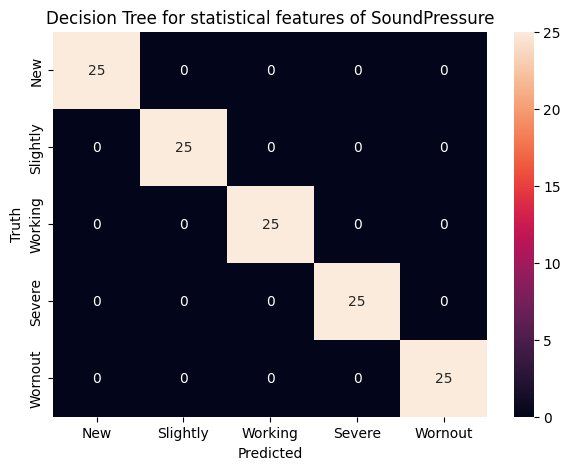

In [88]:

cm=confusion_matrix(y_predict_entropy_f,output_train)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm,fmt='g', annot=True,xticklabels=['New','Slightly','Working','Severe','Wornout'],yticklabels=['New','Slightly','Working','Severe','Wornout'])
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Decision Tree for statistical features of SoundPressure')

In [89]:
plt.plot(input['range'])

KeyError: 'range'

In [90]:
feat=feat.drop(columns='target')

KeyError: "['target'] not found in axis"

C:\Users\Smile\AppData\Local\Temp\ipykernel_7772\4052998618.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data_sp = input.corr()
C:\Users\Smile\AppData\Local\Temp\ipykernel_7772\4052998618.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dataplot_sp = sb.heatmap(feat.corr(), cmap="YlGnBu", annot=True, fmt="0.1f")


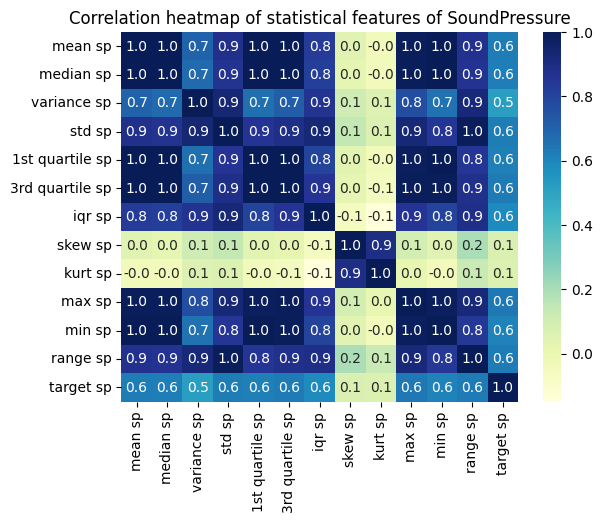

In [91]:
%matplotlib inline
data_sp = input.corr()
dataplot_sp = sb.heatmap(feat.corr(), cmap="YlGnBu", annot=True, fmt="0.1f")
plt.title("Correlation heatmap of statistical features of SoundPressure")
plt.show()

In [212]:
df18short_v={'mean v':list(),'median v':list(),'variance v':list(),'std v':list(),'1st quartile v':list(),'3rd quartile v':list(),'iqr v':list(),'skew v':list(),'kurt v':list(),'max v':list(),'min v':list(),'range v':list(),'target v':list()}
pd.options.mode.copy_on_write = True 
X_here_v=X.drop(columns=['SoundPressure'])
for i in range(0,len(df),10):
    df18short_v['mean v'].append(X_here_v.iloc[i:i+10].mean())
    df18short_v['median v'].append(X_here_v.iloc[i:i+10].median())
    #df18short['mode'].append(X_here.iloc[i:i+10].mode())
    df18short_v['variance v'].append(X_here_v.iloc[i:i+10].var())
    df18short_v['std v'].append(X_here_v.iloc[i:i+10].std())
    df18short_v['1st quartile v'].append(X_here_v.iloc[i:i+10].quantile(0.25))
    df18short_v['3rd quartile v'].append(X_here_v.iloc[i:i+10].quantile(0.75))
    df18short_v['iqr v'].append(X_here_v.iloc[i:i+10].quantile(0.75)-X_here_v.iloc[i:i+10].quantile(0.25))
    df18short_v['skew v'].append(X_here_v.iloc[i:i+10].skew())
    df18short_v['kurt v'].append(X_here_v.iloc[i:i+10].kurt())
    df18short_v['max v'].append(X_here_v.iloc[i:i+10].max())
    df18short_v['min v'].append(X_here_v.iloc[i:i+10].min())
    df18short_v['range v'].append(X_here_v.iloc[i:i+10].max()-X_here_v.iloc[i:i+10].min())
    df18short_v['target v'].append(y[i])
feat_v=pd.DataFrame(df18short_v)
feat_v.info()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   mean v          250 non-null    object
 1   median v        250 non-null    object
 2   variance v      250 non-null    object
 3   std v           250 non-null    object
 4   1st quartile v  250 non-null    object
 5   3rd quartile v  250 non-null    object
 6   iqr v           250 non-null    object
 7   skew v          250 non-null    object
 8   kurt v          250 non-null    object
 9   max v           250 non-null    object
 10  min v           250 non-null    object
 11  range v         250 non-null    object
 12  target v        250 non-null    int32 
dtypes: int32(1), object(12)
memory usage: 24.5+ KB


In [207]:
input_v=feat_v.drop(columns=['target v'])
output_v=feat_v['target v']
print(input_v.shape,output_v.shape)

(250, 12) (250,)


In [208]:
from sklearn.model_selection import train_test_split

# Use stratify parameter to ensure equal proportions of each class in train and test sets
input_train_v, input_test_v, output_train_v, output_test_v = train_test_split(
    input_v, output_v, test_size=0.5, random_state=104
)

print(len(input_train_v), len(output_train_v))


125 125


In [209]:
entropy=DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=50, min_samples_leaf=3)
entropy.fit(input_test_v,output_test_v)
y_predict_entropy_fv=entropy.predict(input_train_v)
print(accuracy_score(y_predict_entropy_fv,output_train_v))    

0.336


C:\Users\Smile\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_array_api.py:380: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)
C:\Users\Smile\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_array_api.py:380: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)


In [83]:

cmv=confusion_matrix(y_predict_entropy_fv,output_train_v)
%matplotlib qt
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cmv,fmt='g', annot=True,xticklabels=['New','Slightly','Working','Severe','Wornout'],yticklabels=['New','Slightly','Working','Severe','Wornout'])
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Decision Tree for statistical features of velocity')

Text(0.5, 1.0, 'Decision Tree for statistical features of velocity')

In [84]:
y_predict_entropy_fv.shape

(125,)

C:\Users\Smile\AppData\Local\Temp\ipykernel_16548\1890757332.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data_v = feat_v.corr()
C:\Users\Smile\AppData\Local\Temp\ipykernel_16548\1890757332.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dataplot_sp = sb.heatmap(feat_v.corr(), cmap="YlGnBu", annot=True, fmt=".1f")


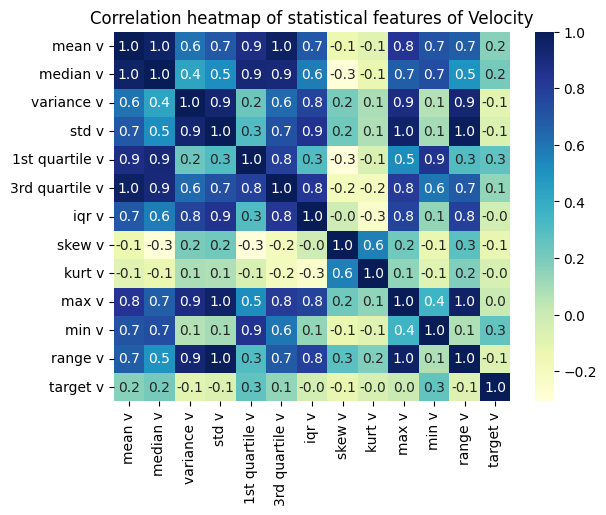

In [213]:
%matplotlib inline
#feat_v=feat_v.drop(columns='target v')
data_v = feat_v.corr()
dataplot_sp = sb.heatmap(feat_v.corr(), cmap="YlGnBu", annot=True, fmt=".1f")
plt.title("Correlation heatmap of statistical features of Velocity")
plt.show()

In [98]:
input=input.dropna()
input.shape
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
feat_scale=scaler.fit_transform(input)
feat_scale.shape

C:\Users\Smile\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_array_api.py:380: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)
C:\Users\Smile\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_array_api.py:380: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)


(250, 12)

In [99]:
rows_with_nan = np.any(np.isnan(feat_scale), axis=1)
print(np.where(np.isnan(feat_scale)))
feat_scale = feat_scale[~rows_with_nan]
feat_scale.shape

(array([], dtype=int64), array([], dtype=int64))


(250, 12)

In [100]:
from sklearn.decomposition import PCA
pca=PCA(0.95)
x_pca=pca.fit_transform(feat_scale)
x_pca.shape

(250, 3)

In [101]:
output1=output[:958]
output1.shape

(250,)

In [102]:
output=output1

In [103]:
x_pca_train,x_pca_test,output_train,output_test=train_test_split(x_pca,output,test_size=0.50,random_state=100,stratify=output)
print(len(input_train),len(output_train))

125 125


In [104]:
entropy.fit(x_pca_test,output_test)
pca_predict=entropy.predict(x_pca_test)
print("accuracy: ",accuracy_score(pca_predict,output_test))
print("precision: ",precision_score(pca_predict,output_test,average='weighted'))
print("f1 score: ",f1_score(pca_predict,output_test,average='weighted'))
print("recall: ",recall_score(pca_predict,output_test,average='weighted'))

accuracy:  1.0
precision:  1.0
f1 score:  1.0
recall:  1.0


In [93]:
pca_predict.shape

(125,)

In [105]:
# Statistical test
contingency = pd.crosstab(output_test,pca_predict)
chi2, p_value = stats.chi2_contingency(contingency)[:2]
print(f"P-value: {p_value:.4f}")
print(f"Chi-square statistic: {chi2:.4f}")

P-value: 0.0000
Chi-square statistic: 500.0000


In [106]:
%matplotlib qt
cm=confusion_matrix(pca_predict,output_test)
plt.figure(figsize=(7,5))
sn.heatmap(cm,fmt='g', annot=True,xticklabels=['New','Slightly','Working','Severe','Wornout'],yticklabels=['New','Slightly','Working','Severe','Wornout'])
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Decision Tree for statistical features with pca')

Text(0.5, 1.0, 'Decision Tree for statistical features with pca')

In [107]:
pca_predict.shape

(125,)

In [108]:
#X_here has only sound pressure values

X_here_train,X_here_test,y_train,y_test=train_test_split(X_here,y,test_size=0.50,random_state=100)
print(X_here_test.shape)
print(y_test.shape)


(1250, 1)
(1250,)


In [138]:
import pywt
def flat_wavelet_transform2(data, method):
    """For a 1D or 2D image data, take the wavelet transform"""
    if data.ndim == 1:
        data = data.reshape(1, -1)  # Reshape 1D data to 2D
    coeffs = pywt.wavedec2(data, method)
    output = coeffs[0].reshape(-1)
    for tups in coeffs[1:]:
        for c in tups:
            output = np.concatenate((output, c.reshape(-1)))
    return output


def plot_wavelet_transform( transformed_data, classes):
    plt.figure(figsize=(12, 6))

    
    plt.plot(transformed_data)
    plt.title('Wavelet Transform')
    plt.xlabel('Coefficients')
    plt.ylabel('Magnitude')

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    indices = np.arange(len(classes))
    plt.bar(indices, classes)
    plt.xticks(indices, classes)
    plt.title('Class Distribution')
    plt.xlabel('Classes')
    plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

In [139]:
methods = ['haar','coif1','coif2','coif3','bior1.1','bior1.3','bior3.1','bior3.3','rbio1.1','rbio1.3','rbio3.1','rbio3.3']

transformed_data = flat_wavelet_transform2(X,methods[0])

plot_wavelet_transform(transformed_data, y)


In [140]:
test_transform = flat_wavelet_transform2(X_here_test,methods[0]).reshape(-1,1)
train_transform=flat_wavelet_transform2(X_here_train,methods[0]).reshape(-1,1)

In [141]:
print(len(test_transform),len(y_test))

1250 1250


In [142]:
#entropy=DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=10, min_samples_leaf=2)
entropy.fit(test_transform,y_test)
y_predict_entropy_transform=entropy.predict(train_transform)
print("accuracy score ",accuracy_score(y_predict_entropy_transform,y_train))     
print("precision score ", precision_score(y_predict_entropy_transform,y_train,average='weighted'))
print("recall: ",recall_score(y_predict_entropy_transform,y_train,average='weighted'))
print("f1 score: ",f1_score(y_predict_entropy_transform,y_train,average='weighted'))

accuracy score  1.0
precision score  1.0
recall:  1.0
f1 score:  1.0


In [144]:
# Statistical test
contingency = pd.crosstab(y_test, y_predict_entropy_transform)
chi2, p_value = stats.chi2_contingency(contingency)[:2]
print(f"P-value: {p_value:.4f}")
print(f"Chi-square statistic: {chi2:.4f}")

P-value: 0.8774
Chi-square statistic: 9.7891


In [121]:

cm_feat=confusion_matrix(y_predict_entropy_transform,y_train)
plt.figure(figsize=(7,5))
sn.heatmap(cm_feat,fmt='g', annot=True,xticklabels=['New','Slightly','Working','Severe','Wornout'],yticklabels=['New','Slightly','Working','Severe','Wornout'])
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Decision Tree for wavelet transform')

Text(0.5, 1.0, 'Decision Tree for wavelet transform')

In [116]:
# from sklearn.model_selection import GridSearchCV
# dt = DecisionTreeClassifier(criterion='entropy')
# param_grid={
#     'max_depth':list(range(1,11,1)),
#     'min_samples_leaf':list(range(1,5,1)),
#     'random_state':list(range(75,101,1))    
# }
# grid=GridSearchCV(dt,param_grid,scoring='accuracy')
# grid.fit(X_test,y_test)
# grid.best_score_

In [117]:
# entropy=DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=10, min_samples_leaf=2)
# entropy.fit(X_test,y_test)
# y_predict_entropy=entropy.predict(X_train)
# print(accuracy_score(y_predict_entropy,y_train))                

In [ ]:
# grid.best_params_

In [ ]:
# entropy=DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=10, min_samples_leaf=2)
# entropy.fit(X_test,y_test)
# y_predict_entropy=entropy.predict(X_train)
# print(accuracy_score(y_predict_entropy,y_train))                

In [145]:
input_best=np.asarray(input)
output_best=np.asarray(output)

In [146]:
output_best.shape

(250,)

In [147]:
print(type(float(input_best[0][0])))
type(input_best[0][0])

<class 'float'>


C:\Users\Smile\AppData\Local\Temp\ipykernel_7772\448389004.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(type(float(input_best[0][0])))


pandas.core.series.Series

In [148]:
input_best2=np.empty((250,12))
input_best2.shape
# input_best2[0][0]=float(input_best[0][0])
# input_best2[0][0]

(250, 12)

In [149]:
for i in range(len(input_best2)):
    input_best2[i]=input_best[i]
input_best2.shape

C:\Users\Smile\AppData\Local\Temp\ipykernel_7772\3756779292.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  input_best2[i]=input_best[i]


(250, 12)

In [150]:
from sklearn.feature_selection import SelectKBest,f_classif,chi2
selector=SelectKBest(score_func=f_classif, k=5)
selected_features=selector.fit_transform(input_best2,output_best)
output_best.shape

(250,)

In [151]:
# from sklearn.feature_selection import SelectKBest,f_classif,chi2
# selector_chi=SelectKBest(score_func=chi2, k=5)
# selected_features_chi=selector_chi.fit_transform(input_best2,output_best)
# print(input_best2.shape,output_best.shape,selected_features.shape)

In [152]:
# x_pca_train,x_pca_test,output_train,output_test=train_test_split(x_pca,output,test_size=0.90,random_state=100)
# print(len(input_train),len(output_train))
print(len(selected_features),len(output_best))
selected_features_train,selected_features_test,output_best_train,output_best_test=train_test_split(selected_features,output_best,test_size=0.5,random_state=100,stratify=output)

250 250


In [153]:
entropy.fit(selected_features_train,output_best_train)
pred_best_features=entropy.predict(selected_features_test)
print("accuracy",accuracy_score(pred_best_features,output_best_test))
print("precision",precision_score(pred_best_features,output_best_test,average='weighted'))
print("f1 score",f1_score(pred_best_features,output_best_test,average='weighted'))
print("recall",recall_score(pred_best_features,output_best_test,average='weighted'))

accuracy 1.0
precision 1.0
f1 score 1.0
recall 1.0


In [156]:
# Statistical test
contingency = pd.crosstab(output_best_test, pred_best_features)
chi2, p_value = stats.chi2_contingency(contingency)[:2]
print(f"P-value: {p_value:.4f}")
print(f"Chi-square statistic: {chi2:.4f}")

P-value: 0.0000
Chi-square statistic: 500.0000


In [154]:

cm_feat=confusion_matrix(pred_best_features,output_best_test)
plt.figure(figsize=(7,5))
sn.heatmap(cm_feat,fmt='g', annot=True,xticklabels=['New','Slightly','Working','Severe','Wornout'],yticklabels=['New','Slightly','Working','Severe','Wornout'])
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Decision Tree for best 5 features')

Text(0.5, 1.0, 'Decision Tree for best 5 features')

In [132]:
print(classification_report(pred_best_features,output_best_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        25

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125



In [157]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dt=DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],  # Criterion for splitting
    'max_depth': [2, 4, 6, 8, 10, None],  # Max depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required at a leaf node
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

In [158]:
df=pd.concat([df14.iloc[:500],df20.iloc[:500],df11.iloc[:500],df6.iloc[:500],df18.iloc[:500]])
df.shape

(2500, 3)

In [159]:
input_train,input_test,output_train,output_test=train_test_split(df.drop(columns='target'),df['target'],test_size=0.5,random_state=104)

In [160]:
output_test.head()

184335     Wornout
501424     Working
4321671     Severe
1903839        New
932453         New
Name: target, dtype: object

In [161]:
grid_search.fit(input_train,output_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=1)

In [162]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [164]:
y_pred=grid_search.best_estimator_.predict(input_test)

In [165]:
y_pred[:5]

array(['Wornout', 'Working', 'Severe', 'New', 'New'], dtype=object)

In [166]:
classification_report(y_pred,output_test)

'              precision    recall  f1-score   support\n\n         New       1.00      1.00      1.00       242\n      Severe       1.00      1.00      1.00       259\n    Slightly       1.00      1.00      1.00       263\n     Working       1.00      1.00      1.00       250\n     Wornout       1.00      1.00      1.00       236\n\n    accuracy                           1.00      1250\n   macro avg       1.00      1.00      1.00      1250\nweighted avg       1.00      1.00      1.00      1250\n'

In [167]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,output_test)
%matplotlib qt
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm,fmt='g', annot=True,xticklabels=['New','Slightly','Severe','Working','Wornout'],yticklabels=['New','Slightly','Severe','Working','Wornout'])
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Decision Tree with Hypereparameter tuning (Bayesian and GridSearch)')

Text(0.5, 1.0, 'Decision Tree with Hypereparameter tuning (Bayesian and GridSearch)')

In [168]:
output_br=le.fit_transform(df['target'])
np.unique(output_br)

array([0, 1, 2, 3, 4])

In [170]:
# Statistical test
contingency = pd.crosstab(y_pred,output_test)
chi2, p_value = stats.chi2_contingency(contingency)[:2]
print(f"P-value: {p_value:.4f}")
print(f"Chi-square statistic: {chi2:.4f}")

P-value: 0.0000
Chi-square statistic: 5000.0000


In [171]:
len(df),len(output_br)

(2500, 2500)

In [172]:
from sklearn.linear_model import BayesianRidge
bayesian_estimator = BayesianRidge()

In [173]:
br_train, br_test, br_y_train, br_y_test = train_test_split(df.drop(columns='target'), output_br, test_size=0.5, random_state=42)

In [174]:
bayesian_estimator.fit(br_train,br_y_train)
br_pred=bayesian_estimator.predict(br_test)


In [175]:
bayesian_estimator.coef_

array([ 0.04050239, -0.05153699])

In [176]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(br_pred, br_y_test)
mse

1.2642299091000557

In [177]:
from skopt import BayesSearchCV

In [178]:
opt = BayesSearchCV(
    estimator=dt,
    search_spaces=param_grid,
    n_iter=32,              # Number of parameter settings sampled
    cv=3,                   # 3-fold cross-validation
    n_jobs=-1,              # Use all cores
    random_state=42
)

In [179]:
opt.fit(br_train,br_y_train)

BayesSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=32, n_jobs=-1,
              random_state=42,
              search_spaces={'criterion': ['gini', 'entropy'],
                             'max_depth': [2, 4, 6, 8, 10, None],
                             'min_samples_leaf': [1, 2, 4],
                             'min_samples_split': [2, 5, 10]})

In [180]:
opt.best_params_

OrderedDict([('criterion', 'gini'),
             ('max_depth', 10),
             ('min_samples_leaf', 4),
             ('min_samples_split', 2)])

In [182]:
y_pred_b= opt.predict(br_test)
classification_report(y_pred,output_test)

'              precision    recall  f1-score   support\n\n         New       1.00      1.00      1.00       242\n      Severe       1.00      1.00      1.00       259\n    Slightly       1.00      1.00      1.00       263\n     Working       1.00      1.00      1.00       250\n     Wornout       1.00      1.00      1.00       236\n\n    accuracy                           1.00      1250\n   macro avg       1.00      1.00      1.00      1250\nweighted avg       1.00      1.00      1.00      1250\n'

In [183]:
%matplotlib qt
import matplotlib.pyplot as plt

# Create a plot
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

In [185]:
# Statistical test
contingency = pd.crosstab(y_pred_b, output_test)
chi2, p_value = stats.chi2_contingency(contingency)[:2]
print(f"P-value: {p_value:.4f}")
print(f"Chi-square statistic: {chi2:.4f}")

P-value: 0.1408
Chi-square statistic: 22.0735


In [50]:
%matplotlib qt
import matplotlib.pyplot as plt
plt.figure(1)
plt.subplot(2,2,1)
plt.ylabel("SoundPressure (Pa)")
plt.xlabel("time (s)")
plt.plot(np.arange(500),df14.iloc[:500].SoundPressure)
plt.title("New")
plt.subplot(2,2,2)
plt.plot(np.arange(500),df14.iloc[:500].Velocity)
plt.title("New")
plt.ylabel("Velocity (m/s)")
plt.xlabel("time (s)")
plt.subplot(2,2,3)
plt.title("Slightly")
plt.ylabel("SoundPressure (Pa)")
plt.xlabel("time (s)")
plt.plot(np.arange(500),df20.iloc[:500].SoundPressure)
plt.subplot(2,2,4)
plt.title("Slightly")
plt.ylabel("Velocity (m/s)")
plt.xlabel("time (s)")
plt.plot(np.arange(500),df20.iloc[:500].Velocity)
plt.tight_layout()
plt.show()

In [52]:

%matplotlib qt
import matplotlib.pyplot as plt
plt.figure(2)
plt.subplot(2,2,1)
plt.title("Working")
plt.ylabel("SoundPressure (Pa)")
plt.xlabel("time (s)")
plt.plot(np.arange(500),df11.iloc[:500].SoundPressure)
plt.subplot(2,2,2)
plt.plot(np.arange(500),df11.iloc[:500].Velocity)
plt.title("Working")
plt.ylabel("Velocity m/s")
plt.xlabel("time (s)")
plt.subplot(2,2,3)
plt.ylabel("SoundPressure (Pa)")
plt.xlabel("time (s)")
plt.title("Severe")
plt.plot(np.arange(500),df6.iloc[:500].SoundPressure)
plt.subplot(2,2,4)
plt.ylabel("Velocity (m/s)")
plt.xlabel("time (s)")
plt.title("Severe")
plt.plot(np.arange(500),df6.iloc[:500].Velocity)
plt.tight_layout()
plt.show()

In [54]:
%matplotlib qt
plt.figure(3)
plt.subplot(2,2,1)
plt.title("Wornout")
plt.ylabel("SoundPressure (Pa)")
plt.xlabel("time (s)")
plt.plot(np.arange(500),df18.iloc[:500].SoundPressure)
plt.subplot(2,2,2)
plt.ylabel("Velocity")
plt.title("Wornout")
plt.xlabel("time (s)")
plt.plot(np.arange(500),df18.iloc[:500].Velocity)
plt.tight_layout()
plt.show()

In [167]:
df=pd.concat([df14.iloc[:500],df20.iloc[:500],df11.iloc[:500],df6.iloc[:500],df18.iloc[:500]])
df.shape

(2500, 3)

In [169]:
#trial after concating both features
features=pd.concat([input,input_v],axis=1)

features.shape

(250, 24)

In [175]:
big_entropy=DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=50, min_samples_leaf=3)


In [182]:
feat_train,feat_test,big_train,big_test=train_test_split(features,output,test_size=0.5,random_state=140)
big_train.shape

(125,)

In [183]:

entropy.fit(feat_train,big_train)
# bigpred=entropy.predict(feat_test)
# print(accuracy_score(bigpred,big_test))  

C:\Users\Smile\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_array_api.py:380: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)


DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       random_state=100)

In [184]:
big_pred=entropy.predict(feat_test)

C:\Users\Smile\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_array_api.py:380: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)


In [219]:
print("accuracy score:",accuracy_score(big_pred,big_test))
print("precision score:",precision_score(big_pred,big_test,average='weighted'))
print("F1 score:",f1_score(big_pred,big_test,average='weighted'))
print("Recall score:",recall_score(big_pred,big_test,average='weighted'))

accuracy score: 1.0
precision score: 1.0
F1 score: 1.0
Recall score: 1.0


In [214]:
%matplotlib qt
big = features.corr()
dataplot_sp = sb.heatmap(features.corr(), cmap="YlGnBu", annot=True, fmt="0.1f")
plt.title("Correlation heatmap of statistical features of SoundPressure(sp) and Velocity(v)")
plt.show()

C:\Users\Smile\AppData\Local\Temp\ipykernel_16548\3978206159.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  big = features.corr()
C:\Users\Smile\AppData\Local\Temp\ipykernel_16548\3978206159.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dataplot_sp = sb.heatmap(features.corr(), cmap="YlGnBu", annot=True, fmt="0.1f")


In [220]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
features_scale=scaler.fit_transform(features)
features_scale.shape


C:\Users\Smile\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_array_api.py:380: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)
C:\Users\Smile\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_array_api.py:380: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)


(250, 24)

In [232]:
from sklearn.decomposition import PCA
pca=PCA(0.95)
feat_pca=pca.fit_transform(features_scale)
feat_pca.shape

(250, 6)

In [233]:
pca_train,pca_test,pca_o_train,pca_o_test=train_test_split(feat_pca,output,test_size=0.5,random_state=104)
pca_o_train.shape

(125,)

In [234]:
big_entropy_pca=DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=50, min_samples_leaf=3)



DecisionTreeClassifier(criterion='entropy', max_depth=50, min_samples_leaf=3,
                       random_state=100)

In [241]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dt=DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],  # Criterion for splitting
    'max_depth': [10,20,30,40,50,60,70, None],  # Max depth of the tree
    'min_samples_split': [2,3,4,5,6,7],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 3,4]    # Minimum number of samples required at a leaf node
}

grid_search_pca = GridSearchCV(estimator=big_entropy_pca, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

In [242]:
grid_search_pca.fit(pca_train,pca_o_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=50,
                                              min_samples_leaf=3,
                                              random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, None],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5, 6, 7]},
             verbose=1)

In [244]:
out=big_entropy_pca.predict(pca_test)
accuracy_score(out,pca_o_test)

0.816

In [253]:

# Function to extract wavelet features
def extract_wavelet_features(array, wavelet='haar'):
    wavelet_features = []
    
    # Loop through each feature (column)
    for i in range(array.shape[1]):
        # Extract the column (feature) and ensure it's writable
        data_array = array[:, i].copy()
        
        # Apply Discrete Wavelet Transform (DWT) for each feature using Haar wavelet
        coeffs = pywt.wavedec(data_array, wavelet, level=2)
        
        # Combine all coefficients (approximation and details) into a single array
        feature_coeffs = np.concatenate(coeffs)
        wavelet_features.append(feature_coeffs)
    
    # Transpose the result to match the original shape (features as columns)
    return np.array(wavelet_features).T


In [256]:
df.drop(columns='target').shape

(2500, 2)

In [257]:
extracted=extract_wavelet_features(np.array(df.drop(columns='target')))

In [259]:
outs=df['target']

In [268]:
wave_train,wave_test,outs_train,outs_test=train_test_split(extracted,outs,random_state=141,test_size=0.5)

In [269]:
entropy.fit(wave_train,outs_train)
preds=entropy.predict(wave_test)
accuracy_score(preds,outs_test)

0.5048

In [263]:
extracted.shape

(2500, 2)

In [265]:
d=pd.DataFrame(extracted)

In [266]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2500 non-null   float64
 1   1       2500 non-null   float64
dtypes: float64(2)
memory usage: 39.2 KB


In [267]:
d.describe()

,0,1
count,2500.000000,2500.000000
mean,15.989896,0.006296
std,35.013027,1.054393
min,-23.085342,-5.551282
25%,-0.459312,-0.316584
50%,0.485600,0.000396
75%,20.437416,0.331145
max,161.636309,9.575231
